# Artificial Intelligence 1 Week 5 Practical
### Goals
This session is designed to give you experience of:
- loading an unlabelled dataset in python
- creating 'Data Visualisations' --such as 2D and 3D scatter plots with different colourings to examine the relationships between the values of different features
     in your data set
- running the unsupervised clustering algorithm 'k-Means' and examining the effect of different settings for parameters such as the number of clusters
    

### By the end of this session you should have

- Understood how to go about visualising a new data set
- Understood how to find clusters - if they exist - in your data.
- Understood the importance of selecting and applying suitable  data preprocessing methods

### Before next week you should have
- Completed the exercises below for the Iris dataset
- Expanded the domain-specific knowledge contents of your revision bot with definitions and examples for all the other key concepts covered so far.

### Additional Resources
- **Seaborn** is a richer library you can import into notebooks for easily making visualisations. Try looking at the example gallery from here: https://seaborn.pydata.org
         
- There is lots of help available for producing plots in matplotlib - if in doubt, just google your error!

- **plotly** is a fantastic toolkit for making really nice data visualisations where you can link different plots so they respond together as you zoom/pan/select different features to look at.
  - You can install it locally and run within a notebook,  but this is probably too complex to go into in this module.
  - but you can upload your data and create really nice visualisations here: https://chart-studio.plotly.com/create/#/

<div class="alert alert-block alert-warning", style= "color:black">
 <b>REMEMBER:</b> There is lots of help available for producing plots in matplotlib - and in fact with almost any python problem.  If in doubt, just google your error!</div>



# Part 0 : Refresher on accessing data from  Python arrays
<img src="slicing.png" style="float:right"><div class="alert alert-block alert-info"> <b>ASIDE: Python arrays and slicing:</b> Python has a <b>numpy</b> module with lots of useful code for doing math, and creating and manipulating arrays of data <br>If we have a 2D numpy array X  we can select just parts of it - i.e. groups of rows, or colums, by "slicing". <br>  We specify the range of rows we want, then the range of columns using X[startRow: endRow, startCol: endCol] <br>
    <ul>
        <li><b>the endRow and endCol are not included in the slice.</b></li>
    <li> If start or end are empty, then the slices goes right from the start or right to the end</li>
    <li> if the start is empty and the end is negative, the slices comes from the end of the row/column</li>
    </ul> 
<b>Example 1:</b>. If we put the letters of my name into a 1-D array  then we can pick out what we want as shown in the cell below. <br>
<b>Example 2</b> (also in the cell below) If we have all the tutors names we could pick out just one row,  or the nth letter in all their names. <br><b>Example 3</b>, if (as in the iris data in this tutorial) X has 150 rows and 4 columns then:
 <ul>
     <li> A = X[ 0 : 50 , :].  A is a 2d array containing the first 50 rows, and all 4 columns</li>
     <li> B = X[ : , 3:].   B is a 1D array with 150 rows and  the columns 3 and onwards (in this case, it is just the last)<br>
     <li> C = X[ 0: 2, 0:4] C is a 2D array with 3 rows and 4 columns <br></div>

In [1]:
import numpy as np

#Example 1
print('Declaring a 1d array')
jimsName = np.array ( ['j','i','m',' ','s','m','i','t','h'])
print(jimsName)
print('extracting a range of values from a 1-D array:')
print( jimsName[0:3])

# Example 2
print('\n Declaring a  a 2D array:')
tutorsNames = np.array([['j','i','m',' ','s','m','i','t','h',' ',' ',' '], 
                        ['c','h','r','i','s',' ','s','i','m','o','n','s'], 
                        ['n','a','t','h','a','n',' ','d','u','r','a','n']],dtype=str)
print(tutorsNames)

print('Extracting the a row from a 2D array - in this cas the second')
print(tutorsNames[1, : ])   # every column of the second row

print('Extracting a range of columns from every row of a 2D array')
print(tutorsNames[ :, 1:5])

# This example uses negative index to read from the end of a slice
print('extracting a specific block of data from a 2D array')
print(tutorsNames[2,-5:])

Declaring a 1d array
['j' 'i' 'm' ' ' 's' 'm' 'i' 't' 'h']
extracting a range of values from a 1-D array:
['j' 'i' 'm']

 Declaring a  a 2D array:
[['j' 'i' 'm' ' ' 's' 'm' 'i' 't' 'h' ' ' ' ' ' ']
 ['c' 'h' 'r' 'i' 's' ' ' 's' 'i' 'm' 'o' 'n' 's']
 ['n' 'a' 't' 'h' 'a' 'n' ' ' 'd' 'u' 'r' 'a' 'n']]
Extracting the a row from a 2D array - in this cas the second
['c' 'h' 'r' 'i' 's' ' ' 's' 'i' 'm' 'o' 'n' 's']
Extracting a range of columns from every row of a 2D array
[['i' 'm' ' ' 's']
 ['h' 'r' 'i' 's']
 ['a' 't' 'h' 'a']]
extracting a specific block of data from a 2D array
['d' 'u' 'r' 'a' 'n']


<div class="alert alert-block alert-warning", style= "color:black">
    <h2> Part 1: Creating and adapting a simple data visualisation</h2>
    Read through and run the following cells that describe the data set and make a basic scatter plot
    </div>
    

## Get the data: in this case  a classic data set: Iris flowers <img src="../lectures/figures/ML/Iris-image.png" style="float:right">
This is a classic Machine Learning Data set
- 4 measurements (features): sepal and petal width and length
- 50 examples  from each  sub-species for iris flowers
- three class problem: Iris-Virginica, Iris-Setosa or Iris-Versicolor

### For the purpose of this tutorial we are going to ignore the fact that we are provided with class labels

**Run the next cell** to import some useful libraries and then load the iris dataset into two arrays
- irisX (the features - 150 rows x 4 columns)
- irisy (the class labels - we'll ignore these)

We'll also make a list of the feature names so we can use them to label our plots.

In [2]:
# load the data
from sklearn.datasets import load_iris
import numpy as np

irisX, irisy = load_iris(return_X_y = True)

feature_names = ['sepal width','sepal_length','petal_width','petal_length']

# Print the first 5 rows of Iris data
print(feature_names)
print(irisX[:5])

['sepal width', 'sepal_length', 'petal_width', 'petal_length']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## Now we will see how we can use the matplotlib library to create a scatter plot

For this first plot we will just look at the first two features

### We'll start by just using the first two features and creating a basic scatter plot

In [3]:
# select every row and just the first|second column into two 1-D arrays for the x and y axes
#using  variables to say what features we want for the x- and y-axis of the plot so we can change these easily

xaxis_feature = 0 
yaxis_feature = 1

x = irisX[:, xaxis_feature]
y = irisX[:, yaxis_feature]

# Print the first 5 rows of x and y values
print(feature_names[xaxis_feature])
print(x[:5])
print(feature_names[yaxis_feature])
print(y[:5])

sepal width
[5.1 4.9 4.7 4.6 5. ]
sepal_length
[3.5 3.  3.2 3.1 3.6]


To do this we'll call matplotlib.pyplot to create a canvas (fig) with a single subplot on it.

- Like most things in python, you can achieve the same effect in many different ways
- There's a really good thread here: https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python
about why most people choose to do it this way.

- As you'll see shortly,   you can use the same syntax to put multiple plots in a grid within one figure
- briefly, its useful to be able to separate  'global' properties for the whole picture (size, title) and properties for each subplot via the ax properties (x/y axis labels, subtitles etc)


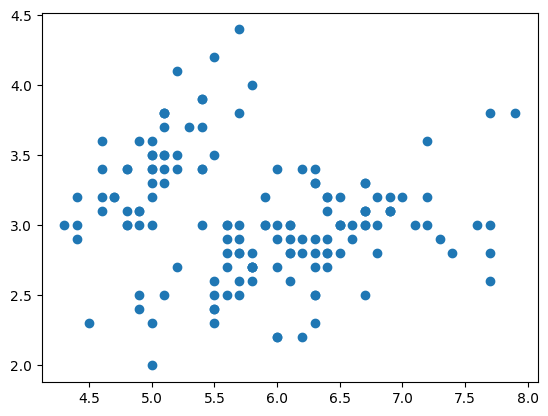

In [4]:
import matplotlib.pyplot as plt
#%matplotlib inline

fig,ax = plt.subplots()
ax.scatter(x,y)

### Now lets add some 'decoration' to the plot so it is more informative

Text(0, 0.5, 'sepal_length')

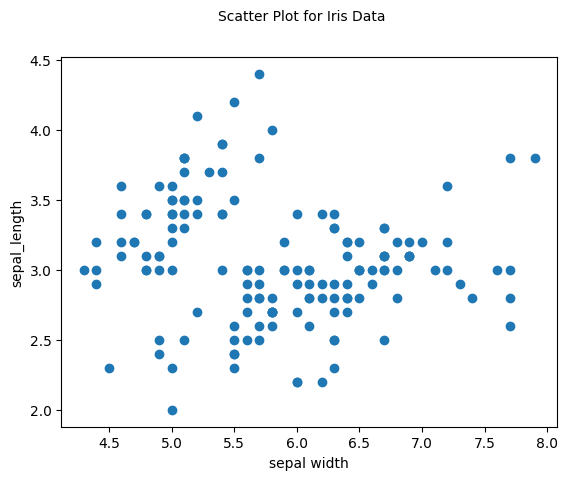

In [5]:
fig,ax = plt.subplots()
ax.scatter(x,y)
## Lets start with a title
title= fig.suptitle("Scatter Plot for Iris Data", fontsize=10)

# and add some axis labels: recall we stored these in the list "feature_names" in case they were useful
ax.set_xlabel(feature_names[xaxis_feature], fontsize=10)
ax.set_ylabel(feature_names[yaxis_feature], fontsize=10)

<div class = "alert alert-warning" style= "color:black">
    <h2>Activity 1: Creating and formatting simple 2D visualisations</h2>
    </div>

<div class = "alert alert-warning" style= "color:black">
    <h3>Activity 1.1: Editing the code to examine different combinations of features </h3>
The cell below contains the all code used above to generate the scatter plot.<br>
 Note that  the code that sets the axis labels is no longer hard coded to the labels for features 0 and 1
<ol>
    <li> For each combination of values xaxis_feature/yaxis_feature in the range 0...3
        <ul>
            <li> <b>Edit</b> the first two lines so that the combination is selected, then</li>
            <li><b>run</b> the changed version to examine the effect of looking at different combinations of variables (there are 12 altogether)</li>
        </ul>
    </li>
    </li>
    <li> Then <b>run</b> the cell below that to answer a question about the data</li>
    </ol>        
    </div>

Text(0, 0.5, 'sepal_length')

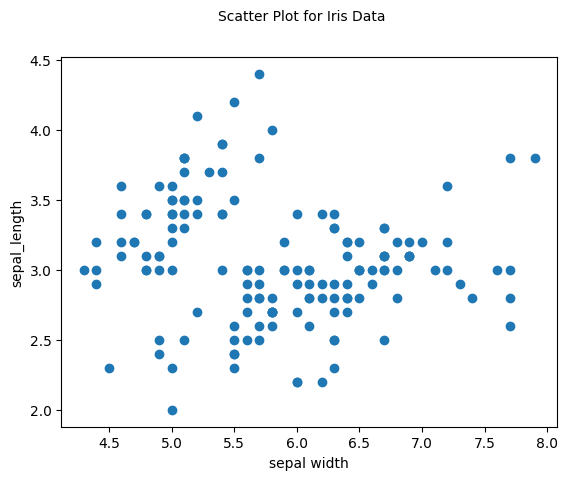

In [6]:
# select the features to show
xaxis_feature = 0
yaxis_feature = 1
x = irisX[:, xaxis_feature]
y = irisX[:, yaxis_feature]

#create the scatter plot
fig,ax = plt.subplots()
ax.scatter(x,y)
## Lets start with a title
title= fig.suptitle("Scatter Plot for Iris Data", fontsize=10)

# and add some axis labels: recall we stored these in the list "feature_names" in case they were useful
ax.set_xlabel(feature_names[xaxis_feature], fontsize=10)
ax.set_ylabel(feature_names[yaxis_feature], fontsize=10)

In [7]:
import workbook5_mcq
from IPython.display import display

display(workbook5_mcq.Q1)

<div class = "alert alert-warning" style= "color:black">
    <h3>Activity 1.2  Adding formatting to your plot and saving it to file</h3>
    Follow stages 1-4 from the descriptionp below then answer the 3 multiple choice questions.
    </div>

This code example sets the overall title' for the figure object, and the axis-labels, and their font sizes
1. **Change** the font-size of both to something more readable on your screen

2. **Experiment** with setting the total figure size using:  
  ```` fig.set_size_inches(10, 5)```` after you have created it via the call to subplots **or**   
   ```` fix,ax = plt.subplots(figsize=(10, 5))```` at the time when you create it.  
  You will probably want to change these numbers to something appropriate to your screen.  
  *In practice you usually only use one of these methods.*
  
  
3. **Experiment** with changing the marker  style, colour, and size. For example try changing:     
    ```ax.scatter(x,y)``` to ```ax.scatter(x,y,c='red',marker = '^',s=10)```  
   The default circle marker is 'o', try with other symbols such as: '.', 's', 'v', '+','x'


4. When you are happy you have found a plot that displays the data well, **save your plot** by adding the command ```` fig.savefig("your_filename.png")````
 - obviously change the filename to something more informative such as the names of the features you are displaying.  
   The more confident of you might try to create the filename algorithmically within your code!
 -  pyplot supports saving in lots of different file formats (jpg, png,svg). 
 -  and you can change things like the resolution (dpi)  
 -  See https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html 
  

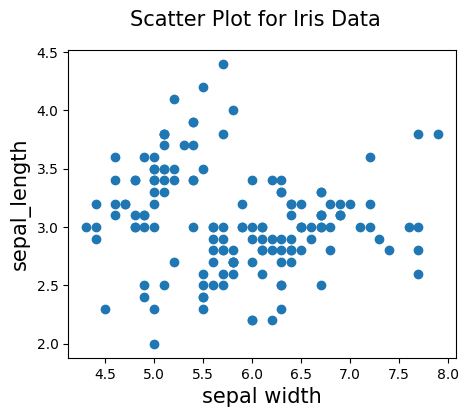

In [8]:
# edit the next two lines of  code  to choose a good combinations of features you found
xaxis_feature = 0
yaxis_feature = 1
x = irisX[:, xaxis_feature: xaxis_feature+1]
y = irisX[:, yaxis_feature: yaxis_feature+1]

# experiment with these two ways of changing the size
fig,ax = plt.subplots(figsize=(10,5))
fig.set_size_inches(5,4)

# exeriment with changing the colours and shapes of markers here
ax.scatter(x,y)


## useful information to display
title= fig.suptitle("Scatter Plot for Iris Data", fontsize=15)
ax.set_xlabel(feature_names[xaxis_feature], fontsize=15)
_=ax.set_ylabel(feature_names[yaxis_feature], fontsize=15)

# when you're happy add the savefig command here

### Answer these questions to check you understood the formatting

In [9]:
display(workbook6_mcq.Q2)
display(workbook6_mcq.Q3)
display(workbook6_mcq.Q4)

NameError: name 'workbook6_mcq' is not defined

## Making the visualisations Interactive

One major advantage of jupyter notebooks is that we can use them to make interactive figures.
Since we can also "hide" the code cells, and host notebooks,  
that means we can make interactive presentations
to distribute to other people.

For now, we will focus on adding the ability to pan, zoom, rescale, and save changed figures to file with the click of a button.

<img src = "figures/matplotlibNoteBookInteractions.png" style="float:right" width=400>

- The code in the cell below is a version of what you saw already with the exception of the  first line: ```%matplotlib notebook```.     
- This is not  python it is a 'jupyter magic' command, and has to be at the top of a cell.    
- It turns on  a jupyter feature  which lets us make interactive graphics.  

-There's a nice [blog about interactive notebooks here](https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1) which is where I copied the image from

<div class = "alert alert-warning" style= "color:black">
    <h3>Activity 1.3: Using interactive visualisations</h3>
    <b>Run</b> the code below and <b>experiment to discover</b> which buttons let you pan/zoom/resave/save to file. <br> 
Hint: If you have clicked on the button with 4 arrows, you should be able to move the whole viewpoint (pan)  
and also 'rescale' (squeeze/expand) the data just along one axis 
  depending on whether you are using left/right mouse buttons (1 / 2 figure drags on a trackpad). <br> 
    <b>Note that you can only have one  interaction active at  a time, so when you are done, click on the blue exit button</b>
    </div>

In [ ]:
#%matplotlib notebook


xaxis_feature = 0
yaxis_feature = 1
x = irisX[:, xaxis_feature: xaxis_feature+1]
y = irisX[:, yaxis_feature: yaxis_feature+1]

fig,ax = plt.subplots(figsize=(10,5))

ax.scatter(x,y)


## useful information to display
title= fig.suptitle("Scatter Plot for Iris Data", fontsize=10)
ax.set_xlabel(feature_names[xaxis_feature], fontsize=10)
ax.set_ylabel(feature_names[yaxis_feature], fontsize=10)

<div class = "alert alert-warning" style= "color:black">
    <h2>Part 2: Using the k-Means algorithm to discover clusters in the data</h2>
    Work through the following cells to learn how to call and use sci-kit learn implementation of the k-means algorithm
    </div>



In [ ]:
# Example
from sklearn.cluster import KMeans

# in this case we will create a kMeans model that just looks for two clusters
## call the constructor
clusterModel = KMeans(n_clusters=2)

## most of the ML models in sklearn provide both a fit() and a predict() method
## in this case 'fitting' the model means finding the best cluster centres as described in the lecture
clusterModel.fit(irisX)

### Lets ask it what it found!

When the model was fitted to our data it stores the cluster centres it found as an attribute, so we will start by printing that.
- The outputs will be  a 2d numpy array with one row for each cluster centre, and one column for each variable
- In this case, the Iris data has four features to represent each of the examples.
- So each row represents the co-ordinates in 4-D space of one the cluster centres

In [ ]:
print( f" the fitted unsupervised models contains {clusterModel.n_clusters} clusters")
print(f" The clusters centres are stored in a {type(clusterModel.cluster_centers_)} of shape {clusterModel.cluster_centers_.shape}")
print ( f'This is the contents of that array:\n{clusterModel.cluster_centers_}' )



Most classes of sklearn models implement a predict() method.  
For KMeans, that  outputs the index of the nearest cluster center to each data point
- So the next cell calls this method on our kMeans object, stores the result, then prints it out.
- The output will be a list with one 'cluster-id' for each example in the data set.
  - Thus if the Nth entry is a 0 it means that data item N has been assigned to (is  "in") cluster 0.
  - Where the one whose centre was at row 0 when we listed the cluster centres just above.

In [ ]:
#first two lines are only here to show the whole workflow
from sklearn.cluster import KMeans
clusterModel = KMeans(n_clusters=2)
clusterModel.fit(irisX)
cluster_ids = clusterModel.predict(irisX)
print(f'this is the cluster to which each data item has been assigned by the model:\n{cluster_ids}') 

<div class = "alert alert-warning" style= "color:black">
    <h2> Activity 2: Grouping and Visualising unlabelled  data using the kMeans Unsupervised Learning method </h2>
    <br>This activity is typical of many AI/Data science workflows in python, because we are going to combine snippets of code from different places
    </div>
    
<div class = "alert alert-warning" style= "color:black">
    <h3> Activity 2.1: Using visualisations to determine how many clusters to use </h3>
<ol>
    <li> Combine  existing code to make a visualisation
    <ul>
        <li> <b>Copy</b> the clustering code from the cell above into the cell below</li>
        <li>Then <b>add your visualisation code from Activity 1.2</b> to produce what you think is the most 'informative' scatter plot (the best pair of features)</li>
        <li> <b>Change the call to the plotting function</b> from <code>ax.scatter(x,y)</code>   to <code>ax.scatter(x,y,c=cluster_ids)</code> <br>
            so that it use a different colour marker for each cluster.</li>
    </ul>
    </li>  
    <li> Change and rerun the code  to <b>investigate</b> what happens if you specify  2,3,4,5 clusters.
    <li> Make a decision what number of clusters 'looks' a best fit to the data. </li>
    </ol>
    </div>

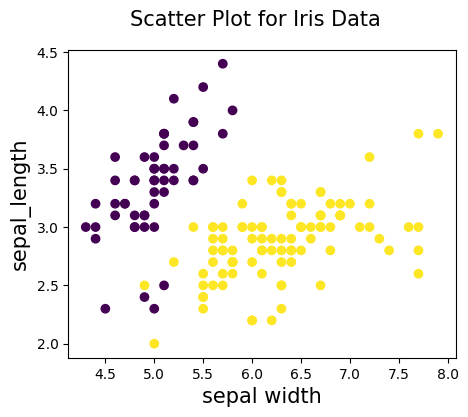

In [13]:
## Copy the 3 lines of code here that creates a kmeans model, finds the clusters and reports the clusterlabels
from sklearn.cluster import KMeans
   # constructor
clusterModel = KMeans(n_clusters=2)
  #call to fit data
clusterModel.fit(irisX)
  # call to get cluster labels for data
cluster_ids = clusterModel.predict(irisX)
## then put the code from activity 1.2 that makes a simple scatter plot here
# edit the next two lines of  code  to choose a good combinations of features you found
xaxis_feature = 0
yaxis_feature = 1
x = irisX[:, xaxis_feature: xaxis_feature+1]
y = irisX[:, yaxis_feature: yaxis_feature+1]

# experiment with these two ways of changing the size
fig,ax = plt.subplots(figsize=(10,5))
fig.set_size_inches(5,4)

# exeriment with changing the colours and shapes of markers here
ax.scatter(x,y, c=cluster_ids)
## useful information to display
title= fig.suptitle("Scatter Plot for Iris Data", fontsize=15)
ax.set_xlabel(feature_names[xaxis_feature], fontsize=15)
_=ax.set_ylabel(feature_names[yaxis_feature], fontsize=15)
## remember to change the call to ax.scatter() to use different coloured markers for different clusters

<div class = "alert alert-warning" style= "color:black">
    <h2> Part 3: Making more complex visualisations with matplotlib </h2>
    This activity is designed to give you insights into how we go about creating richer visualisations.<br>
    Work through the cells below: in places you will need to reuse variables you created above (e.g. cluster_ids)
    </div>

The method defined below uses the power of matplotlib subplots to make a canvas (figure) containing a grid of plots (axes).  
It 'asks' the parameter X (the data) how many features (columns) it has then uses loops to plot all the different scatter plots in a grid.
It also takes a second parameter y to colour the  markers

After defining the methods the final line calls it for the iris feature values and the cluster ids we found with the twoClusterModel.

You should see that in 'interactive' mode,  panning and zooming now works independently in each subplot.  

<div class = "alert alert-warning" style= "color:black">
<h3> Activity 3.1 Showing the scatter plot matrix for your 'preferred' version of the data </h3>
    
Edit the code  in the cell to  experiment with different values for K (number of clusters) to find the one that you think represent the best visualisation of the data.
    </div>


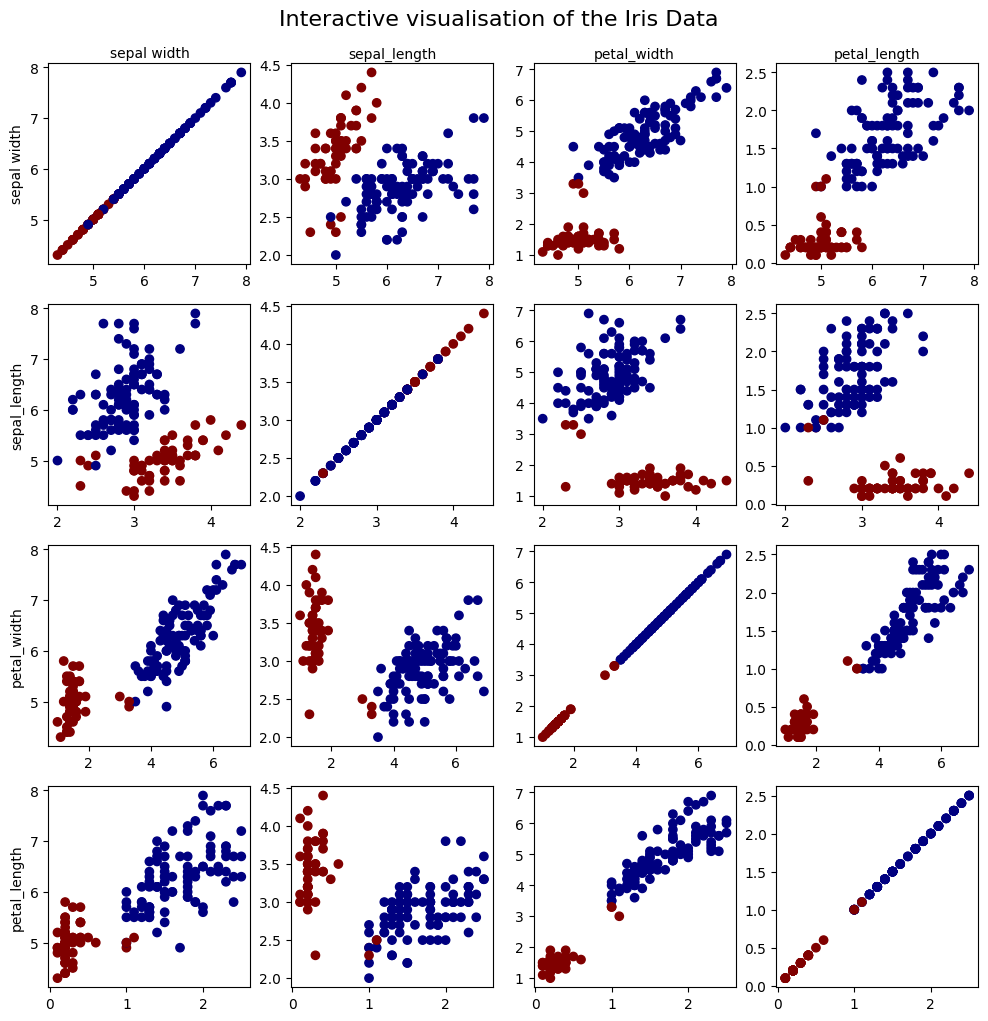

In [22]:
 
# EDIT THE NEXT LINE: to chose the value of K
K=2
# create the cluster labels
clusterModel = KMeans(n_clusters=K)
clusterModel.fit(irisX)
cluster_ids = clusterModel.predict(irisX)


def show_scatterplot_matrix(X,y,featureNames,title=None):
    f = X.shape[1]
    if(len(y) != X.shape[0]):
        print("Error, the y array must have the same length as there are rows in X")
        return
    fig, ax = plt.subplots(f,f,figsize=(12,12))
    plt.set_cmap('jet')
    for feature1 in range(f):
        ax[feature1,0].set_ylabel( featureNames[feature1])
        ax[0,feature1].set_xlabel( featureNames[feature1])
        ax[0,feature1].xaxis.set_label_position('top') 
        for feature2 in range(f):
            xdata = X[:,feature1]
            ydata = X[:,feature2]
            ax[feature1, feature2].scatter(xdata,ydata,c=y)

    if title != None:
        fig.suptitle(title,fontsize=16,y=0.925)

show_scatterplot_matrix(irisX,cluster_ids,feature_names,title="Interactive visualisation of the Iris Data")

<div class = "alert alert-warning" style= "color:black">
    <h3> Activity 3.2:  Modifying what is in some subplots</h3>
    Change the code to show a histogram on the leading diagonal<br>
    i.e. change <code>ax[feature1, feature2].scatter(xdata,ydata,c=y)</code> <br>
    to <br>
    <code>if (feature1!=feature2):
    ax[feature1, feature2].scatter(xdata,ydata,c=y)
else:
    ax[feature1,feature2].hist(xdata) </code>

You may need to consult [the documentation for the axis.hist() method](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.hist.html?highlight=hist#matplotlib.axes.Axes.hist  )      
</div>

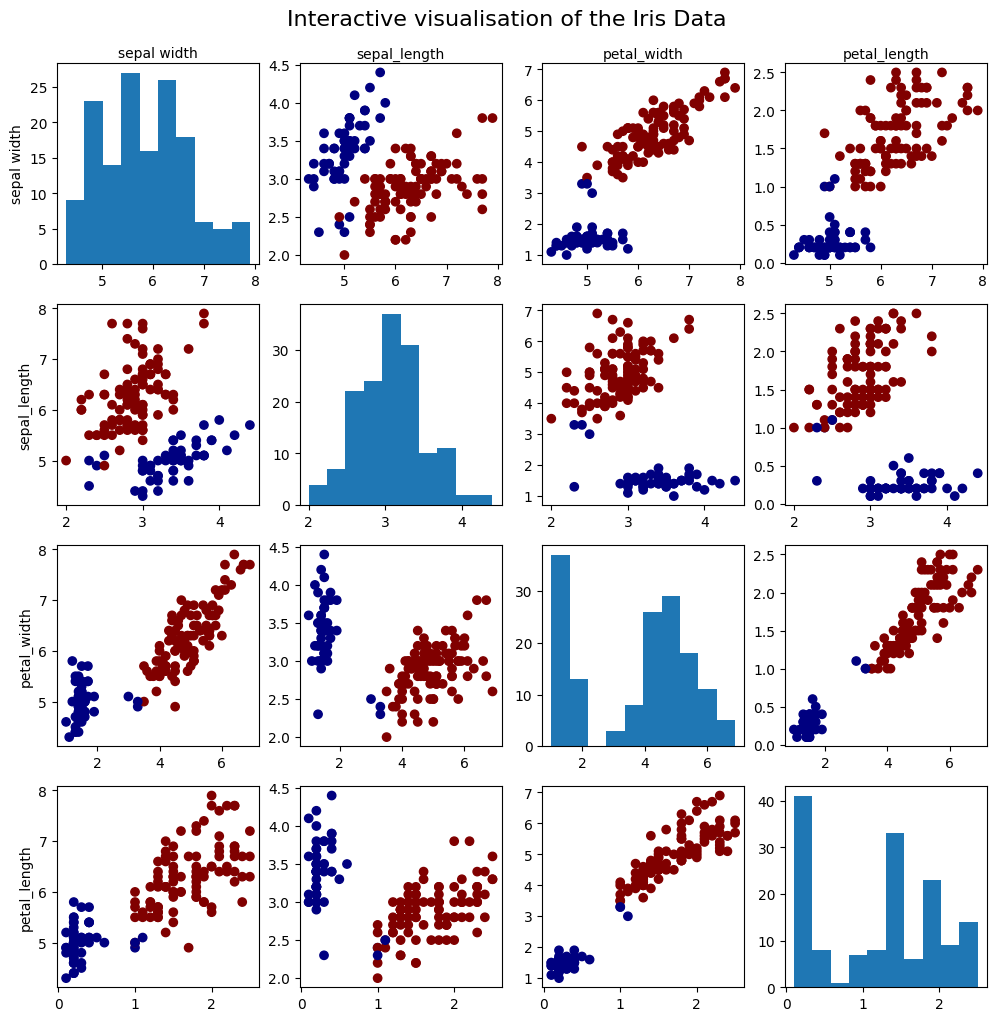

In [21]:
 # EDIT THE NEXT LINE: to chose the value of K
K=2
# create the cluster labels
clusterModel = KMeans(n_clusters=K)
clusterModel.fit(irisX)
cluster_ids = clusterModel.predict(irisX)


def show_scatterplot_matrix(X,y,featureNames,title=None):
    f = X.shape[1]
    if(len(y) != X.shape[0]):
        print("Error, the y array must have the same length as there are rows in X")
        return
    fig, ax = plt.subplots(f,f,figsize=(12,12))
    plt.set_cmap('jet')
    for feature1 in range(f):
        ax[feature1,0].set_ylabel( featureNames[feature1])
        ax[0,feature1].set_xlabel( featureNames[feature1])
        ax[0,feature1].xaxis.set_label_position('top') 
        for feature2 in range(f):
            xdata = X[:,feature1]
            ydata = X[:,feature2]
            if (feature1!=feature2):
                ax[feature1, feature2].scatter(xdata,ydata,c=y)
            else:
                ax[feature1,feature2].hist(xdata)

    if title != None:
        fig.suptitle(title,fontsize=16,y=0.925)

show_scatterplot_matrix(irisX,cluster_ids,feature_names,title="Interactive visualisation of the Iris Data")

<div class = "alert alert-warning" style= "color:black">
    <h3> Activity 3.3: Stretch activity for the more experienced python programmers</h3>
It would be nice if the histograms also had different colours for different cluster labels. <br> 
To do that you need to  split the irisData into three subsets according to your clustered class labels, then either:<ul>
<li> make three separate calls to the you could adapt code from the examples at the bottom of the matplotlib page linked above
<li> or pass the three subsets as a list i.e. <code>ax[feature1,feature2].hist(x=(subset1,subset2,subset3))</code> </li> 
    </ul>
    </div>

[[<Axes: xlabel='sepal width', ylabel='sepal width'>
  <Axes: xlabel='sepal_length'> <Axes: xlabel='petal_width'>
  <Axes: xlabel='petal_length'>]
 [<Axes: ylabel='sepal_length'> <Axes: > <Axes: > <Axes: >]
 [<Axes: ylabel='petal_width'> <Axes: > <Axes: > <Axes: >]
 [<Axes: ylabel='petal_length'> <Axes: > <Axes: > <Axes: >]]


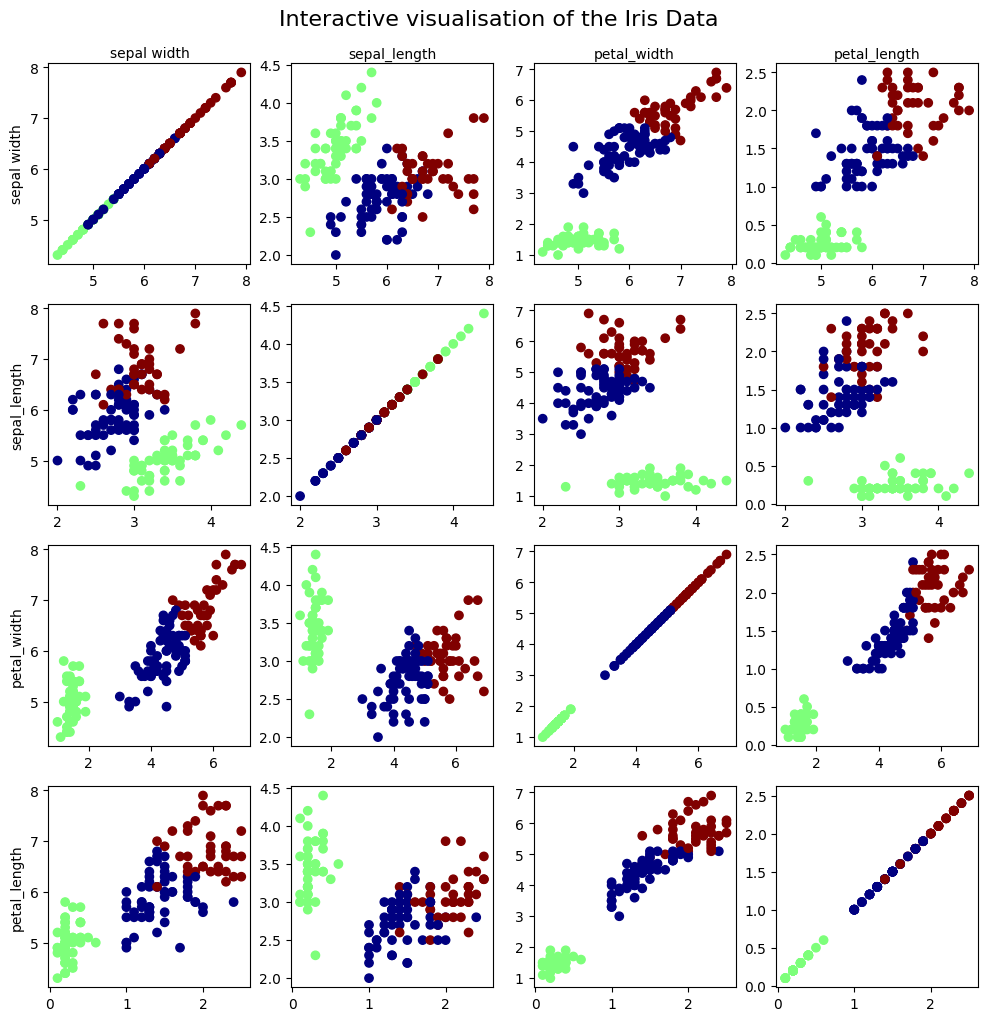

In [31]:
 # EDIT THE NEXT LINE: to chose the value of K
K=3
# create the cluster labels
clusterModel = KMeans(n_clusters=K)
clusterModel.fit(irisX)
cluster_ids = clusterModel.predict(irisX)

def show_scatterplot_matrix(X,y,featureNames,title=None):
    hist_color_list = ["#d1237e", "#71cc29", "#b59013"]
    f = X.shape[1]
    if(len(y) != X.shape[0]):
        print("Error, the y array must have the same length as there are rows in X")
        return
    fig, ax = plt.subplots(f,f,figsize=(12,12))
    plt.set_cmap('jet')
    for feature1 in range(f):
        ax[feature1,0].set_ylabel( featureNames[feature1])
        ax[0,feature1].set_xlabel( featureNames[feature1])
        ax[0,feature1].xaxis.set_label_position('top') 
        for feature2 in range(f):
            xdata = X[:,feature1]
            ydata = X[:,feature2]
            ax[feature1, feature2].scatter(xdata,ydata,c=y)
    print(ax)
    if title != None:
        fig.suptitle(title,fontsize=16,y=0.925)

show_scatterplot_matrix(irisX,cluster_ids,feature_names,title="Interactive visualisation of the Iris Data")

<div class = "alert alert-warning" style= "color:black">
<h2>Activity 4: Preparation for coursework </h2>
    Make sure that you are confident in how to assemble snippets of code to: <ul>
    <li> Read in a dataset from file (<b> HINT</b> google numpy.genfromtxt() )</li>
    <li> Run kmeans on the data to get a set of  cluster labels for the data points</li>
    <li> Make a 2d visualisation of the results with: <ul>
        <li> Suitable titles and labels for axes </li>
        <li> Different colour markers for each cluster </li>
        </ul> </li>
    <li> Experiment to find a suitable value for the number of clusters</li>
    </ul>
    When you are ready: <ol>
    <li>put all those snippets into a single function with this signature<br>
    <code> def cluster_and_visualise(datafilename:string, K:int, featurenames:list):</code> </li>
    <li> Put that code into a separate file called myVisualiser.py: the cell below will help you do that</li>
    <li> Run the simple python script in the second cell below to import that function and make sure it works</li>
    </ol>
    HINT: For testing, you should find you have a data folder that contains three files from the apple/orange/bananas example.<br>
    Try using fruit_values.csv for the data. The  featurenames were listed in the week 1 lecture notebooks 
    </div>

**Develop your code in the next cell**
When you run  the next  cell it will write the contents (not including the %%writwfile line) to a file that you can submit.

In [ ]:
%%writefile "myVisualiser.py"
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
def cluster_and_visualise(datafilename, K, featureNames):
    ##your code goes here
    pass


## Use the next cell to
- load the function from the python file you just saved
- run it on some sampel data
- let you compare what your code produces to the marking scheme

In [ ]:
import myVisualiser 
import importlib 
importlib.reload(myVisualiser)

featurenames= ( 'mean_red', 'mean_green', 'mean_blue','width', 'height', 'weight')
datafile= 'data/fruit_values.csv'
myVisualiser.cluster_and_visualise(datafile, 3,featurenames ) 

<div class = "alert alert-warning" style= "color:black">
    <h2>Activity 5 (Stretch) : Understanding the role of pre-processing</h2>
    This is an additional activity for those of you who have made rapid progress.
    </div>

<div class = "alert alert-warning" style= "color:black">
    <h3> Activity 5.1: Investigate the effect of differently scaled data</h3>
 <b>First</b> we will investigate what could happen if your measurements are in different units,  so one feature has values spanning a bigger range. <ul>
        <li> Make a copy of the iris data and convert the second  feature from cm to mm, <br> 
        You can create the version of the data using code like: <code>  irisXscaled = copy.deepcopy(irisX)</code><br>
        Then multiply the values in one column by ten like: <code> irisXscaled [:, 1:2] *=10 </code>
    </li>
   <li> Rerun kMeans on the new data (for your preferred number of clusters) and visualisation to see what difference it makes <br>
       You will need to  select some of the columns and pass them into your graphing code in the same way you did for the irisX data.</li>
    </ul>
</div>

In [ ]:
import copy
# 1. put your code to change the data here (you could print the first few rows of data to see the effect of scaling)

# 2. then put the four lines of code that create a kmeans object and run clustering   here - changing irisX to irisXscaled in three places

# 3. then put your visualisation code here - but select x and y from irisXscaled instead of irisX

<div class = "alert alert-warning" style= "color:black">
<h3> Activity 5.2: Using preprocessing so all the features have equal importance in kMeans distance calculations. </h3> 
Read the explanation below then: <ol>
    <li> <b>Add</b> the following lines to your code to get the preprocessed data.<br>
     <code>  scaler = sklearn.preprocessing.MinMaxScaler()
  scaler.fit(irisX)
  irisXnormalised = scaler.transform(irisX)</code>
    </li>
    <li> <b>Rerun </b> the clustering then visualisation for this normalised data and observe the difference.
    </ol>
    </div>
    
    
  

  
 ### Explanation
 As well as classes for different types of models, sklearn provides many preprocessing classes.  
Like models these implement a 'fit()' method,  but instead of `predict()' they have a 'transform()' method. 

A common way to make each feature equally important is to transform each one so that its values lie between 0 and 1.   
Assuming as usual  we store our set of examples as rows in an array X, with a  column for each features.  
For each individual feature j (column in X) it: 
- finds the highest  and lowest  values in column j of X
- uses these to calculate  the *range* of values in the column range(X[,j]) = max(X[,j] - min(X[,j])  
- subtracts the min(X[,j]) from each value so that they now all start from 0 and the highest value is now max(X[,j] - min(X[,j])
- divide each value by the range(X[,j]) so the upper value  is now 1

If you're feeling confident about numpy arrays and data slicing you could try implementing this your self using a loop over each column (X.shape[1]) and doing slicing making calls to numpy's min(), max() functions.  
There's some clues here:  https://stackoverflow.com/questions/12701659/finding-range-of-a-numpy-array-elements

In [ ]:
import copy, sklearn
# 1. put your code to change the data here (you could print the first few rows of data to see the effect of normalising)

# 2. then put the four lines of code that create a kmeans object and run clustering   here - changing irisX to irisXnormalised in two plces

# 3. then put your visualisation code here - but select x and y from irisXnormalised instead of irisX


**Decide for yourself which of the three sets of visualisation is clearer**  
Having filled in and run the cell above,  run the cell below and answer the questions to check your understanding
 

In [ ]:
display(workbook6_mcq.Q5)
display(workbook6_mcq.Q6)

<div class="alert alert-block alert-danger"> Please save your work (click the save icon) then shutdown the notebook when you have finished with this tutorial (menu->file->close and shutdown notebook). <br> 
    Also remember to download and save your work.</div>


